In [1]:
import matplotlib.pyplot as plt
import numpy as np
from mst_algorithm import MST
from mst_graphs_local import NetworkXGraph
import networkx as nx
import random
import time
from enum import Enum


In [2]:
global_size = 1000
global_degree = 4
global_max_weight = 100
global_max_read = 300

def print_constants(graph_type, weight_distribution):
    output = "Size: "+str(global_size)+"\n"+"Degree: "+str(global_degree)+"\n"+"Max Weight: "+str(global_max_weight)+"\n"+"Max Read: "+str(global_max_read)+"\n"+"Graph Type: "+str(graph_type)+"\n"+"Weight Distribution: "+str(weight_distribution)+"\n"
    print(output)
 

In [3]:
#Random NetworkX graph

def random_graph(degree,size):
    graph = nx.generators.random_regular_graph(degree, size)
    return graph
    
#Expanders NetworkX Graph

def expander_graph(size):
    graph = nx.generators.paley_graph(size)
    return graph


# Complete graph

def complete_graph(size):
    graph = nx.generators.complete_graph(size)
    return graph

# Cycle graph

def cycle_graph(size):
    graph = nx.generators.cycle_graph(size)
    return graph


In [7]:
def assign_random_edge_weights(graph, max_weight):
    for (u, v) in graph.edges():
        graph.edges[u, v]['weight'] = random.randint(1, max_weight)
    return graph

def assign_exponential_edge_weights(graph,custom_scale=1):
    for (u, v) in graph.edges():
        graph.edges[u, v]['weight'] = round(np.random.exponential(scale=custom_scale))
    return graph

def assign_normal_edge_weights(graph, max_weight):
    for (u, v) in graph.edges():
        graph.edges[u, v]['weight'] = round(np.random.normal(loc=(max_weight/2)))
    return graph

In [8]:
class GraphType(Enum):
    RANDOM = 'ramdom_graph'
    EXPANDER = 'expander_graph'
    COMPLETE = 'complete_graph'
    CYCLE = 'cycle_graph'
    
class WeightDistribution(Enum):
    RANDOM = 'random_weights'
    EXPONENTIAL = 'exponantial_weights'
    NORMAL = 'normal_weights'
    

def kruskall_comparison(custom_size=global_size,graph_type=GraphType.RANDOM,weight_distribution=WeightDistribution.RANDOM):
    print("Create graph with the following constants:")
    print_constants(graph_type,weight_distribution)
    
    #Chose here different graph options from above
    if graph_type == GraphType.RANDOM:
        graph = random_graph(global_degree,custom_size)
    elif graph_type == GraphType.EXPANDER:
        graph = expander_graph(custom_size)
    elif graph_type == GraphType.COMPLETE:
        graph = complete_graph(custom_size)
    elif graph_type == GraphType.CYCLE:
        graph = complete_graph(custom_size)
            
    #Chose here different weight sampling options from above
    if weight_distribution == WeightDistribution.RANDOM:
        graph = assign_random_edge_weights(graph, global_max_weight)
    elif weight_distribution == WeightDistribution.EXPONENTIAL:
        graph = assign_exponential_edge_weights(graph)
    elif weight_distribution == WeightDistribution.NORMAL:
        graph = assign_normal_edge_weights(graph,global_max_weight)
    
    #Our algorithm
    our_start_time = time.time()
    approx = MST(
        NetworkXGraph(graph, custom_size, global_max_weight, global_max_read)
    ).approx_weight()
    our_runtime = time.time() - our_start_time
    print("Our Runtime: "+str(our_runtime))
    #print("Our MST weight approx. for random graph:", approx,"\n")
    
    #NetworkX Kruskall Algorithm
    kruskall_start_time = time.time()
    mst=nx.minimum_spanning_tree(graph)
    kruskall_time = time.time()-kruskall_start_time
    print("NetworkX Kruskall runtime: "+str(kruskall_time))

    gt_w = sum(graph.edges[e]["weight"] for e in mst.edges)
    print("ground truth weight", gt_w)

    ratio = max(gt_w, approx) / min(gt_w, approx)
    print("error %", 100 * (ratio - 1))
    

In [ ]:
def increasing_runtime_performance():
    sizes = []
    o_times = []
    k_times = []
    for size in range(1000,1001000,10000):
        print(size)
        o,k = kruskall_comparison(custom_size=size, graph_type=GraphType.RANDOM)
        sizes.append(size)
        o_times.append(o)
        k_times.append(k)
    plt.plot(sizes,o_times)
    plt.plot(sizes,k_times)
    plt.show()

1000
Our Runtime: 0.06713604927062988
NetworkX Kruskall runtime: 0.021989822387695312
11000
Our Runtime: 0.027547836303710938
NetworkX Kruskall runtime: 0.43912506103515625
21000
Our Runtime: 0.0384831428527832
NetworkX Kruskall runtime: 0.5826749801635742
31000
Our Runtime: 0.029041767120361328
NetworkX Kruskall runtime: 1.0970590114593506
41000
Our Runtime: 0.02457404136657715
NetworkX Kruskall runtime: 1.2358109951019287
51000
Our Runtime: 0.061578989028930664
NetworkX Kruskall runtime: 2.4220848083496094
61000
Our Runtime: 0.013967037200927734
NetworkX Kruskall runtime: 2.1596670150756836
71000
Our Runtime: 0.015963077545166016
NetworkX Kruskall runtime: 2.620074987411499
81000
Our Runtime: 0.03652191162109375
NetworkX Kruskall runtime: 2.5409798622131348
91000
Our Runtime: 0.015041828155517578
NetworkX Kruskall runtime: 2.6734778881073
101000
Our Runtime: 0.027146339416503906
NetworkX Kruskall runtime: 3.4765100479125977
111000
Our Runtime: 0.03313422203063965
NetworkX Kruskall ru

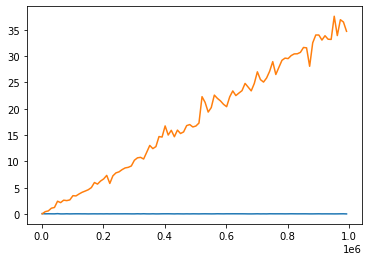

In [10]:
increasing_runtime_performance()